# Linear Regression - Boston Housing Rate Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\guntu\OneDrive\Desktop\BostonHousing.csv')

In [3]:
# Remove columns with null values
df = df.dropna(axis=1)

In [4]:
# Display the first few rows to understand the data
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [5]:
# Calculate the Pearson correlation coefficient between each attribute and the output 'medv'
correlation_matrix = df.corr()

# Assuming 'price' is the output column
price_correlations = correlation_matrix['medv'].sort_values(ascending=False)

# Print the correlation values
print(price_correlations)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


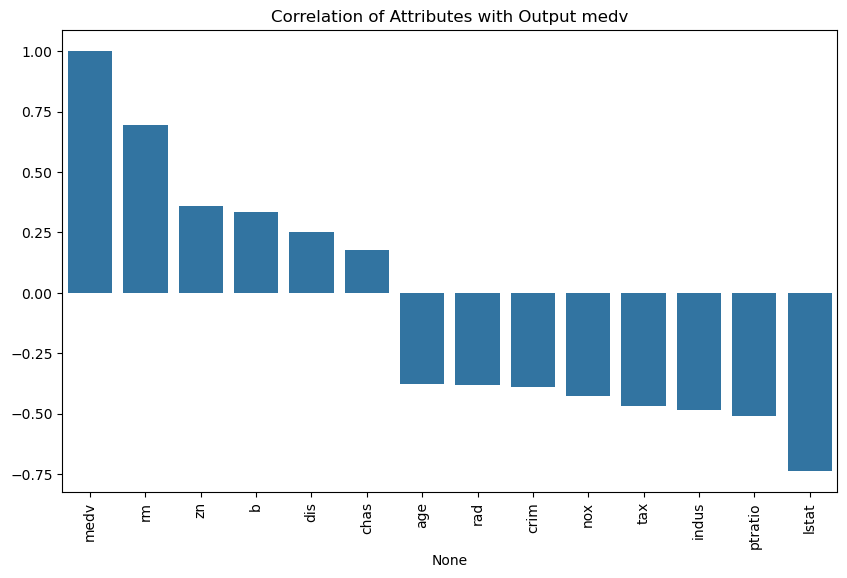

In [6]:
# Plot the correlations with 'medv'
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=price_correlations.index, y=price_correlations.values)
plt.xticks(rotation=90)
plt.title('Correlation of Attributes with Output medv')
plt.show()

In [7]:
# Remove rows with outliers (if any, based on Z-score)
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [8]:
# Identify the input and output columns
# Assuming the last column is the output (target) and the rest are inputs
X = df.iloc[:, :-1].values  # all columns except the last
y = df.iloc[:, -1].values   # last column

In [9]:
# Normalize the input features and the target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Flatten to maintain 1D shape


In [10]:
# Add a bias term (column of ones) to X
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

In [11]:
# Full-Batch Gradient Descent
def full_batch_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape  # m: number of samples, n: number of features
    theta = np.zeros(n)  # Initialize coefficients (theta)
    cost_history = []

    for i in range(iterations):
        # Compute the predictions
        y_pred = X.dot(theta)
        # Compute the error
        error = y_pred - y
        # Compute the gradient
        gradient = (1/m) * X.T.dot(error)
        # Update the coefficients
        theta -= learning_rate * gradient
        # Compute the cost (LMS Loss)
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)

    return theta, cost_history

In [12]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape  # m: number of samples, n: number of features
    theta = np.zeros(n)  # Initialize coefficients (theta)
    cost_history = []

    for i in range(iterations):
        cost = 0
        for j in range(m):
            # Randomly select an index for stochastic update
            random_index = np.random.randint(0, m)
            X_j = X[random_index, :].reshape(1, -1)
            y_j = y[random_index]
            # Compute the prediction
            y_pred = X_j.dot(theta)
            # Compute the error
            error = y_pred - y_j
            # Compute the gradient
            gradient = X_j.T.dot(error)
            # Update the coefficients
            theta -= learning_rate * gradient.flatten()
            # Compute the cost for this point
            cost += (1/2) * (error**2).flatten()
        cost_history.append(cost/m)

    return theta, cost_history

In [13]:
# Function to calculate SSE and R-squared
def calculate_metrics(X, y, theta):
    # Predicted values
    y_pred = X.dot(theta)
    # Sum of Squared Errors (SSE)
    sse = np.sum((y - y_pred) ** 2)
    # R-squared (R²) Error
    ss_total = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (sse / ss_total)
    return sse, r_squared

In [14]:
# Run Full-batch Gradient Descent
theta_full, cost_history_full = full_batch_gradient_descent(X_normalized, y_normalized)

# Run Stochastic Gradient Descent
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_normalized, y_normalized)

# Calculate SSE and R² for Full-batch Gradient Descent
sse_full, r_squared_full = calculate_metrics(X_normalized, y_normalized, theta_full)

# Calculate SSE and R² for Stochastic Gradient Descent
sse_sgd, r_squared_sgd = calculate_metrics(X_normalized, y_normalized, theta_sgd)


In [15]:
# Print the coefficients and metrics for comparison
print("Full-batch Gradient Descent Coefficients:", theta_full)
print("Full-batch Gradient Descent SSE:", sse_full)
print("Full-batch Gradient Descent R²:", r_squared_full)

print("Stochastic Gradient Descent Coefficients:", theta_sgd)
print("Stochastic Gradient Descent SSE:", sse_sgd)
print("Stochastic Gradient Descent R²:", r_squared_sgd)

Full-batch Gradient Descent Coefficients: [-4.81392703e-16 -6.04175947e-02 -3.09577287e-03 -2.13115128e-02
  0.00000000e+00 -1.12721564e-01  3.96931631e-01 -8.01628973e-02
 -2.64119096e-01  1.32798964e-01 -1.32529747e-01 -2.30090386e-01
  3.82846120e-02 -3.56269593e-01]
Full-batch Gradient Descent SSE: 107.25114249083137
Full-batch Gradient Descent R²: 0.7415635120702858
Stochastic Gradient Descent Coefficients: [ 0.02468691 -0.03474693  0.04291054  0.00165345  0.         -0.17768741
  0.39000288 -0.10454857 -0.35410369  0.23709005 -0.21165685 -0.25486661
  0.10310253 -0.29970344]
Stochastic Gradient Descent SSE: 110.14625247771225
Stochastic Gradient Descent R²: 0.7345873434271993


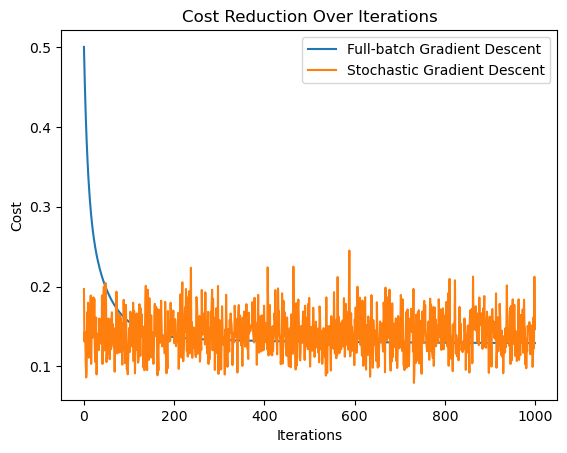

In [16]:
# Plot the cost history for comparison
plt.plot(cost_history_full, label='Full-batch Gradient Descent')
plt.plot(cost_history_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost Reduction Over Iterations')
plt.show()